<a href="https://colab.research.google.com/github/Amal-Abdulllah/AIDL/blob/main/Fire_non_Fire_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Fire_non-Fire/Train '
test_dir = '/content/drive/MyDrive/Colab Notebooks/Fire_non-Fire/Test '


In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Fire_non-Fire/Train /Fire ')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Fire_non-Fire/Train /Non-Fire ')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Fire_non-Fire/Test /Fire ')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Fire_non-Fire/Test /Non-Fire')))

200
200
200
200


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6203 - loss: 1.0217

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 116s 11s/step - accuracy: 0.6275 - loss: 1.0036 - val_accuracy: 0.7375 - val_loss: 0.4864
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.8958 - loss: 0.3064 - val_accuracy: 0.8750 - val_loss: 0.3240
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.8657 - loss: 0.3750 - val_accuracy: 0.9125 - val_loss: 0.2379
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.9169 - loss: 0.2183 - val_accuracy: 0.9125 - val_loss: 0.2399
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.9256 - loss: 0.1732 - val_accuracy: 0.8500 - val_loss: 0.5011
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.9373 - loss: 0.1404 - val_accuracy: 0.8875 - val_loss: 0.2722
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.9591 - loss: 0.1045 - val_accuracy: 0.9125 - val_loss: 0.1926
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.9739 - loss: 0.0911 - val_accuracy: 0.9000 - val_loss: 0.2249
E

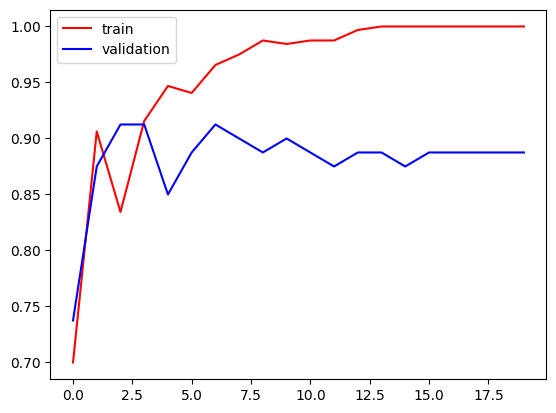

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


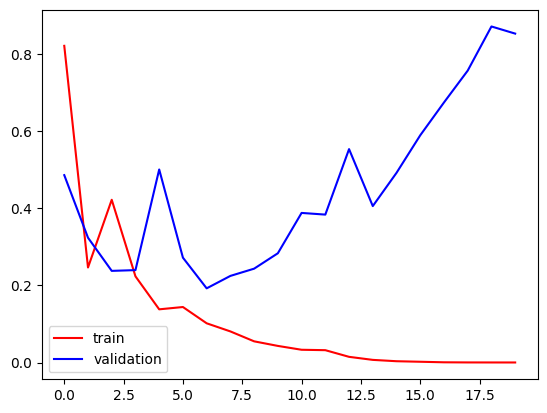

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 400 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[103  97]
 [102  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       200
           1       0.50      0.49      0.50       200

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400




There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting



In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 10s/step - accuracy: 0.7849 - loss: 2.2970 - val_accuracy: 0.5750 - val_loss: 0.8129
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step - accuracy: 0.9325 - loss: 1.1272 - val_accuracy: 0.7750 - val_loss: 0.9576
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 94s 9s/step - accuracy: 0.9172 - loss: 2.0295 - val_accuracy: 0.7500 - val_loss: 2.7948
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 93s 9s/step - accuracy: 0.9180 - loss: 1.3780 - val_accuracy: 0.6125 - val_loss: 7.6238
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step - accuracy: 0.9682 - loss: 0.3352 - val_accuracy: 0.5250 - val_loss: 13.9253
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.9536 - loss: 0.7847 - val_accuracy: 0.5000 - val_loss: 21.5042
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.9605 - loss: 0.4797 - val_accuracy: 0.5000 - val_loss: 24.7272
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 148s 10s/step - accuracy: 0.9588 - loss: 0.7319 - val_accuracy: 0.5000 - v

In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 400 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[  7 193]
 [  3 197]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.70      0.04      0.07       200
           1       0.51      0.98      0.67       200

    accuracy                           0.51       400
   macro avg       0.60      0.51      0.37       400
weighted avg       0.60      0.51      0.37       400



Using Pre-trained model - Resnet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 130s 12s/step - accuracy: 0.5346 - loss: 4.7675 - val_accuracy: 0.5000 - val_loss: 3.5026
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 130s 11s/step - accuracy: 0.4883 - loss: 2.4910 - val_accuracy: 0.5000 - val_loss: 1.7927
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - accuracy: 0.6008 - loss: 1.0463 - val_accuracy: 0.7500 - val_loss: 0.5824
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - accuracy: 0.6539 - loss: 0.8228 - val_accuracy: 0.5750 - val_loss: 0.7855
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 129s 13s/step - accuracy: 0.7330 - loss: 0.5713 - val_accuracy: 0.7250 - val_loss: 0.5511
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 109s 11s/step - accuracy: 0.7788 - loss: 0.4608 - val_accuracy: 0.7125 - val_loss: 0.4862
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.8093 - loss: 0.4392 - val_accuracy: 0.7250 - val_loss: 0.5380
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 110s 11s/step - accuracy: 0.8307 - loss: 0.4256 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 116s 9s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 85 115]
 [ 79 121]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.52      0.42      0.47       200
           1       0.51      0.60      0.56       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.52      0.51       400

